In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from tqdm import tqdm
import base64

tqdm.pandas()
from wekeypedia import WikipediaPage as Page

In [2]:
name = 'Elke Mackenzie'
dead_name = 'SXZhbg=='
page_name = 'Ivan_Mackenzie_Lamb'
co_date = None

In [3]:
# Parameters
name = "Wendy Carlos"
dead_name = "V2FsdGVy"
page_name = "Wendy_Carlos"
co_date = None


In [4]:
def format_revid_index(revid, page):
    return f'<a href="https://fr.wikipedia.org/w/index.php?title={page}&diff=prev&oldid={revid}">{revid}</a>'

# qui sont personnes qui énoncent le deadname dans l'article ?

## article

In [5]:
page = Page(page_name, lang='fr')

In [6]:
revisions = (
    pd
    .DataFrame
    .from_records(page.get_revisions())
    .set_index('revid')
)

revisions

,parentid,user,userid,timestamp,size,sha1,contentformat,contentmodel,comment,*,anon
revid,,,,,,,,,,,
213750840,213245467,Anne Daemon,3147955,2024-03-28T11:33:05Z,16001,aa3511e1f277c82f1edd989b5c10c9d865b9aee6,text/x-wiki,wikitext,suppression doublon image (cf. PDD),{{Voir homonymes|Carlos}}\n<!--MERCI DE BIEN L...,NaN
213245467,213244722,Evpok,215241,2024-03-10T23:58:44Z,15976,ff589bd67c2ebcef5c28c8ab5271dec6f6445750,text/x-wiki,wikitext,Retour au consensus précédent,{{Voir homonymes|Carlos}}\n<!--MERCI DE BIEN L...,NaN
213244722,213213666,37.171.177.227,0,2024-03-10T23:12:13Z,16098,a2ad379f22ca86eac6dfe44cb059e8f2f79d9a7a,text/x-wiki,wikitext,,{{Voir homonymes|Carlos}}\n<!--MERCI DE BIEN L...,
213213666,213129264,Anne Daemon,3147955,2024-03-10T06:54:43Z,15976,ff589bd67c2ebcef5c28c8ab5271dec6f6445750,text/x-wiki,wikitext,Retour à la version initiale (maintien de la m...,{{Voir homonymes|Carlos}}\n<!--MERCI DE BIEN L...,NaN
213129264,213122863,Lefringant,935409,2024-03-07T08:25:58Z,16096,1d9bf9221c1c16994d98eb0a8b2fb919fa7da465,text/x-wiki,wikitext,/* Albums studio */,{{Voir homonymes|Carlos}}\n<!--MERCI DE BIEN L...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4472802,4472745,M350z,35555,2005-12-11T21:46:07Z,2465,e7fa34137dc77fc80e6b9de84eae77cc0b1cf6a4,text/x-wiki,wikitext,,'''W. Carlos''' est un compositeur et interprè...,NaN
4472745,4469826,M350z,35555,2005-12-11T21:42:44Z,2449,ba6af61cea00367a8eab1999711d282713db6937,text/x-wiki,wikitext,citation de Glenn Gould,'''W. Carlos''' est un compositeur et interprè...,NaN
4469826,2445984,M350z,35555,2005-12-11T18:46:07Z,2267,af907728c40f68f31a47b064362b9b47930796f2,text/x-wiki,wikitext,"réécriture de l'art. ""W.Carlos""",'''W. Carlos''' est un compositeur et interprè...,NaN


In [7]:
revisions.to_csv(f'../data/page-revisions/{page_name.lower()}.csv')

In [8]:
def decode(string):
    return base64.b64decode(string).decode("utf-8")

<Axes: xlabel='date'>

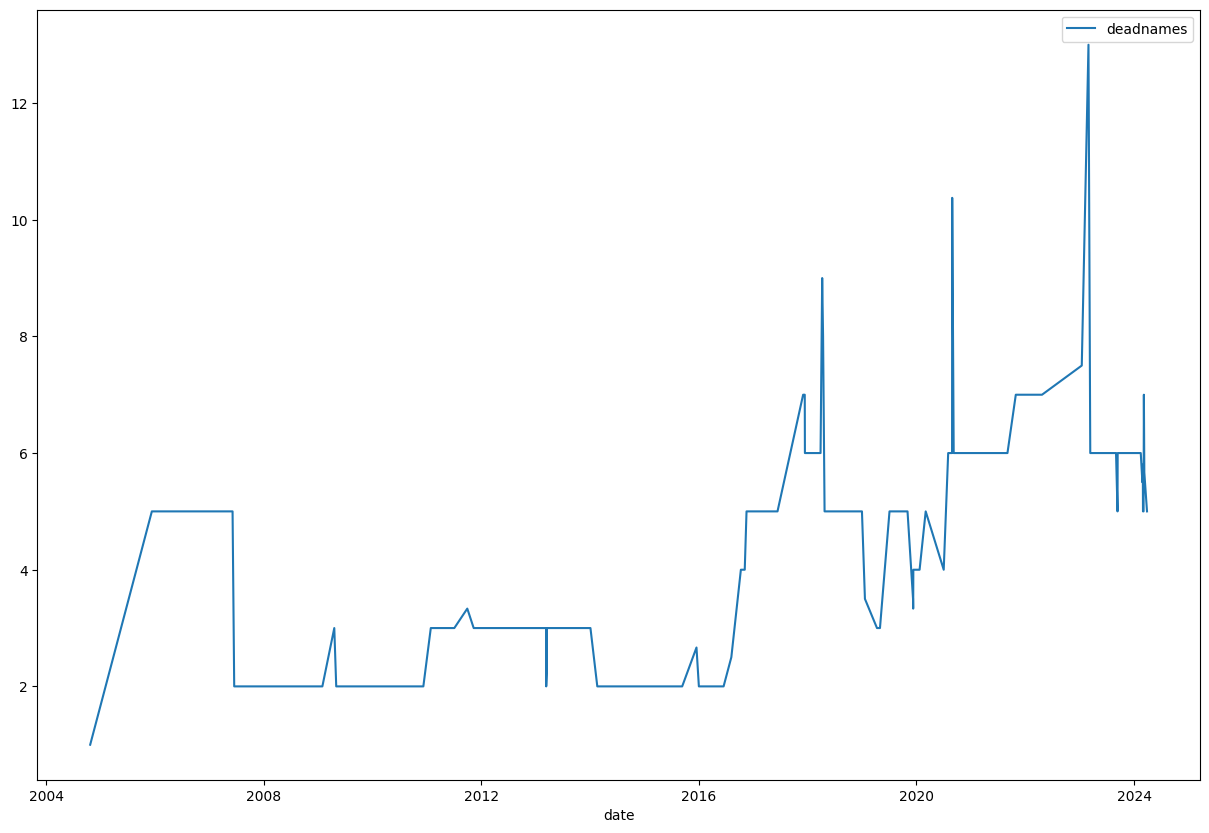

In [9]:
(
    revisions
    .assign(
        deadnames = lambda df: df['*'].apply(lambda x: str(x).lower().count(decode(dead_name).lower()))
    )
    #.reset_index()
    [['timestamp', 'deadnames']]
    .assign(
        date = lambda df: pd.to_datetime(df.timestamp).dt.date
    )
    .groupby('date')
    .agg({'deadnames': 'mean'})
    .plot
    .line(
        figsize=(15,10)
    )
)

In [10]:
def get_diff(revid):
    return page.get_diff(revid)

diffs = revisions.reset_index().revid.progress_apply(lambda x: page.extract_plusminus(get_diff(x))['added'] )

#diffs

  0%|          | 0/298 [00:00<?, ?it/s]

  1%|          | 2/298 [00:00<00:45,  6.52it/s]

  1%|          | 3/298 [00:00<01:14,  3.94it/s]

  1%|▏         | 4/298 [00:01<01:21,  3.59it/s]

  2%|▏         | 5/298 [00:01<01:26,  3.38it/s]

  2%|▏         | 6/298 [00:01<01:25,  3.41it/s]

  2%|▏         | 7/298 [00:01<01:27,  3.33it/s]

  3%|▎         | 8/298 [00:02<01:28,  3.27it/s]

  3%|▎         | 9/298 [00:02<01:30,  3.18it/s]

  3%|▎         | 10/298 [00:02<01:31,  3.13it/s]

  4%|▎         | 11/298 [00:03<01:30,  3.16it/s]

  4%|▍         | 12/298 [00:03<01:39,  2.88it/s]

  4%|▍         | 13/298 [00:03<01:35,  2.97it/s]

  5%|▍         | 14/298 [00:04<01:34,  2.99it/s]

  5%|▌         | 15/298 [00:04<01:33,  3.02it/s]

  5%|▌         | 16/298 [00:04<01:30,  3.10it/s]

  6%|▌         | 17/298 [00:05<01:29,  3.15it/s]

  6%|▌         | 18/298 [00:05<01:28,  3.16it/s]

  6%|▋         | 19/298 [00:05<01:28,  3.16it/s]

  7%|▋         | 20/298 [00:06<01:30,  3.06it/s]

  7%|▋         | 21/298 [00:06<01:27,  3.17it/s]

  7%|▋         | 22/298 [00:06<01:26,  3.18it/s]

  8%|▊         | 23/298 [00:07<01:27,  3.14it/s]

  8%|▊         | 24/298 [00:07<01:27,  3.12it/s]

  8%|▊         | 25/298 [00:07<01:27,  3.13it/s]

  9%|▊         | 26/298 [00:08<01:26,  3.15it/s]

  9%|▉         | 27/298 [00:08<01:26,  3.13it/s]

  9%|▉         | 28/298 [00:08<01:35,  2.83it/s]

 10%|▉         | 29/298 [00:09<01:31,  2.95it/s]

 10%|█         | 30/298 [00:09<01:31,  2.94it/s]

 10%|█         | 31/298 [00:09<01:30,  2.95it/s]

 11%|█         | 32/298 [00:10<01:29,  2.96it/s]

 11%|█         | 33/298 [00:10<01:27,  3.03it/s]

 11%|█▏        | 34/298 [00:10<01:25,  3.07it/s]

 12%|█▏        | 35/298 [00:11<01:25,  3.07it/s]

 12%|█▏        | 36/298 [00:11<01:23,  3.14it/s]

 12%|█▏        | 37/298 [00:11<01:22,  3.17it/s]

 13%|█▎        | 38/298 [00:12<01:23,  3.10it/s]

 13%|█▎        | 39/298 [00:12<01:22,  3.14it/s]

 13%|█▎        | 40/298 [00:12<01:21,  3.15it/s]

 14%|█▍        | 41/298 [00:13<01:20,  3.18it/s]

 14%|█▍        | 42/298 [00:13<01:21,  3.14it/s]

 14%|█▍        | 43/298 [00:13<01:21,  3.12it/s]

 15%|█▍        | 44/298 [00:13<01:20,  3.14it/s]

 15%|█▌        | 45/298 [00:14<01:28,  2.85it/s]

 15%|█▌        | 46/298 [00:14<01:26,  2.91it/s]

 16%|█▌        | 47/298 [00:15<01:31,  2.76it/s]

 16%|█▌        | 48/298 [00:15<01:29,  2.80it/s]

 16%|█▋        | 49/298 [00:15<01:26,  2.87it/s]

 17%|█▋        | 50/298 [00:16<01:24,  2.94it/s]

 17%|█▋        | 51/298 [00:16<01:22,  3.00it/s]

 17%|█▋        | 52/298 [00:16<01:27,  2.82it/s]

 18%|█▊        | 53/298 [00:17<01:24,  2.90it/s]

 18%|█▊        | 54/298 [00:17<01:22,  2.97it/s]

 18%|█▊        | 55/298 [00:17<01:19,  3.07it/s]

 19%|█▉        | 56/298 [00:18<01:17,  3.14it/s]

 19%|█▉        | 57/298 [00:18<01:16,  3.16it/s]

 19%|█▉        | 58/298 [00:18<01:17,  3.10it/s]

 20%|█▉        | 59/298 [00:19<01:16,  3.13it/s]

 20%|██        | 60/298 [00:19<01:16,  3.10it/s]

 20%|██        | 61/298 [00:19<01:21,  2.91it/s]

 21%|██        | 62/298 [00:20<01:18,  3.00it/s]

 21%|██        | 63/298 [00:20<01:19,  2.95it/s]

 21%|██▏       | 64/298 [00:20<01:18,  2.99it/s]

 22%|██▏       | 65/298 [00:21<01:14,  3.11it/s]

 22%|██▏       | 66/298 [00:21<01:13,  3.15it/s]

 22%|██▏       | 67/298 [00:21<01:11,  3.22it/s]

 23%|██▎       | 68/298 [00:21<01:10,  3.25it/s]

 23%|██▎       | 69/298 [00:22<01:16,  3.00it/s]

 23%|██▎       | 70/298 [00:22<01:20,  2.83it/s]

 24%|██▍       | 71/298 [00:23<01:23,  2.72it/s]

 24%|██▍       | 72/298 [00:23<01:19,  2.84it/s]

 24%|██▍       | 73/298 [00:23<01:22,  2.74it/s]

 25%|██▍       | 74/298 [00:24<01:18,  2.86it/s]

 25%|██▌       | 75/298 [00:24<01:16,  2.92it/s]

 26%|██▌       | 76/298 [00:24<01:14,  2.99it/s]

 26%|██▌       | 77/298 [00:25<01:11,  3.09it/s]

 26%|██▌       | 78/298 [00:25<01:18,  2.82it/s]

 27%|██▋       | 79/298 [00:25<01:22,  2.65it/s]

 27%|██▋       | 80/298 [00:26<01:29,  2.44it/s]

 27%|██▋       | 81/298 [00:26<01:29,  2.42it/s]

 28%|██▊       | 82/298 [00:27<01:27,  2.47it/s]

 28%|██▊       | 83/298 [00:27<01:28,  2.43it/s]

 28%|██▊       | 84/298 [00:28<01:21,  2.61it/s]

 29%|██▊       | 85/298 [00:28<01:17,  2.77it/s]

 29%|██▉       | 86/298 [00:28<01:14,  2.84it/s]

 29%|██▉       | 87/298 [00:28<01:11,  2.97it/s]

 30%|██▉       | 88/298 [00:29<01:15,  2.77it/s]

 30%|██▉       | 89/298 [00:29<01:20,  2.60it/s]

 30%|███       | 90/298 [00:30<01:16,  2.72it/s]

 31%|███       | 91/298 [00:30<01:18,  2.62it/s]

 31%|███       | 92/298 [00:30<01:15,  2.74it/s]

 31%|███       | 93/298 [00:31<01:11,  2.86it/s]

 32%|███▏      | 94/298 [00:31<01:10,  2.90it/s]

 32%|███▏      | 95/298 [00:31<01:09,  2.93it/s]

 32%|███▏      | 96/298 [00:32<01:07,  2.99it/s]

 33%|███▎      | 97/298 [00:32<01:05,  3.08it/s]

 33%|███▎      | 98/298 [00:32<01:04,  3.11it/s]

 33%|███▎      | 99/298 [00:33<01:03,  3.15it/s]

 34%|███▎      | 100/298 [00:33<01:09,  2.85it/s]

 34%|███▍      | 101/298 [00:33<01:07,  2.93it/s]

 34%|███▍      | 102/298 [00:34<01:04,  3.02it/s]

 35%|███▍      | 103/298 [00:34<01:03,  3.07it/s]

 35%|███▍      | 104/298 [00:34<01:02,  3.08it/s]

 35%|███▌      | 105/298 [00:35<01:03,  3.02it/s]

 36%|███▌      | 106/298 [00:35<01:01,  3.11it/s]

 36%|███▌      | 107/298 [00:35<01:00,  3.18it/s]

 36%|███▌      | 108/298 [00:36<01:05,  2.92it/s]

 37%|███▋      | 109/298 [00:36<01:04,  2.92it/s]

 37%|███▋      | 110/298 [00:36<01:03,  2.94it/s]

 37%|███▋      | 111/298 [00:37<01:01,  3.04it/s]

 38%|███▊      | 112/298 [00:37<01:00,  3.06it/s]

 38%|███▊      | 113/298 [00:37<00:59,  3.10it/s]

 38%|███▊      | 114/298 [00:38<00:59,  3.08it/s]

 39%|███▊      | 115/298 [00:38<01:02,  2.91it/s]

 39%|███▉      | 116/298 [00:38<01:00,  3.01it/s]

 39%|███▉      | 117/298 [00:39<01:03,  2.86it/s]

 40%|███▉      | 118/298 [00:39<01:03,  2.85it/s]

 40%|███▉      | 119/298 [00:39<01:01,  2.93it/s]

 40%|████      | 120/298 [00:40<00:58,  3.03it/s]

 41%|████      | 121/298 [00:40<00:58,  3.05it/s]

 41%|████      | 122/298 [00:40<00:56,  3.10it/s]

 41%|████▏     | 123/298 [00:41<00:55,  3.16it/s]

 42%|████▏     | 124/298 [00:41<00:55,  3.15it/s]

 42%|████▏     | 125/298 [00:41<01:02,  2.77it/s]

 42%|████▏     | 126/298 [00:42<00:59,  2.91it/s]

 43%|████▎     | 127/298 [00:42<00:57,  2.95it/s]

 43%|████▎     | 128/298 [00:42<00:57,  2.98it/s]

 43%|████▎     | 129/298 [00:43<00:55,  3.06it/s]

 44%|████▎     | 130/298 [00:43<00:55,  3.05it/s]

 44%|████▍     | 131/298 [00:43<00:55,  2.99it/s]

 44%|████▍     | 132/298 [00:44<00:55,  3.00it/s]

 45%|████▍     | 133/298 [00:44<00:53,  3.08it/s]

 45%|████▍     | 134/298 [00:44<00:54,  3.00it/s]

 45%|████▌     | 135/298 [00:45<00:52,  3.08it/s]

 46%|████▌     | 136/298 [00:45<00:53,  3.06it/s]

 46%|████▌     | 137/298 [00:45<00:51,  3.15it/s]

 46%|████▋     | 138/298 [00:46<00:51,  3.13it/s]

 47%|████▋     | 139/298 [00:46<00:51,  3.06it/s]

 47%|████▋     | 140/298 [00:46<00:50,  3.11it/s]

 47%|████▋     | 141/298 [00:47<00:56,  2.78it/s]

 48%|████▊     | 142/298 [00:47<00:58,  2.65it/s]

 48%|████▊     | 143/298 [00:48<01:01,  2.52it/s]

 48%|████▊     | 144/298 [00:48<00:57,  2.70it/s]

 49%|████▊     | 145/298 [00:48<00:54,  2.80it/s]

 49%|████▉     | 146/298 [00:49<00:56,  2.67it/s]

 49%|████▉     | 147/298 [00:49<00:52,  2.85it/s]

 50%|████▉     | 148/298 [00:49<00:51,  2.94it/s]

 50%|█████     | 149/298 [00:50<00:54,  2.74it/s]

 50%|█████     | 150/298 [00:50<00:52,  2.81it/s]

 51%|█████     | 151/298 [00:50<00:50,  2.92it/s]

 51%|█████     | 152/298 [00:51<00:49,  2.96it/s]

 51%|█████▏    | 153/298 [00:51<00:47,  3.04it/s]

 52%|█████▏    | 154/298 [00:51<00:46,  3.11it/s]

 52%|█████▏    | 155/298 [00:52<00:47,  3.00it/s]

 52%|█████▏    | 156/298 [00:52<00:46,  3.03it/s]

 53%|█████▎    | 157/298 [00:52<00:46,  3.05it/s]

 53%|█████▎    | 158/298 [00:52<00:44,  3.12it/s]

 53%|█████▎    | 159/298 [00:53<00:43,  3.17it/s]

 54%|█████▎    | 160/298 [00:53<00:47,  2.91it/s]

 54%|█████▍    | 161/298 [00:54<00:50,  2.73it/s]

 54%|█████▍    | 162/298 [00:54<00:48,  2.80it/s]

 55%|█████▍    | 163/298 [00:54<00:46,  2.93it/s]

 55%|█████▌    | 164/298 [00:55<00:48,  2.76it/s]

 55%|█████▌    | 165/298 [00:55<00:46,  2.86it/s]

 56%|█████▌    | 166/298 [00:55<00:45,  2.91it/s]

 56%|█████▌    | 167/298 [00:56<00:44,  2.93it/s]

 56%|█████▋    | 168/298 [00:56<00:43,  3.00it/s]

 57%|█████▋    | 169/298 [00:56<00:42,  3.02it/s]

 57%|█████▋    | 170/298 [00:57<00:40,  3.12it/s]

 57%|█████▋    | 171/298 [00:57<00:40,  3.17it/s]

 58%|█████▊    | 172/298 [00:57<00:40,  3.11it/s]

 58%|█████▊    | 173/298 [00:58<00:43,  2.85it/s]

 58%|█████▊    | 174/298 [00:58<00:42,  2.94it/s]

 59%|█████▊    | 175/298 [00:58<00:41,  2.98it/s]

 59%|█████▉    | 176/298 [00:59<00:40,  3.01it/s]

 59%|█████▉    | 177/298 [00:59<00:39,  3.06it/s]

 60%|█████▉    | 178/298 [00:59<00:39,  3.06it/s]

 60%|██████    | 179/298 [01:00<00:38,  3.05it/s]

 60%|██████    | 180/298 [01:00<00:38,  3.09it/s]

 61%|██████    | 181/298 [01:00<00:38,  3.06it/s]

 61%|██████    | 182/298 [01:01<00:37,  3.08it/s]

 61%|██████▏   | 183/298 [01:01<00:40,  2.87it/s]

 62%|██████▏   | 184/298 [01:01<00:38,  3.00it/s]

 62%|██████▏   | 185/298 [01:02<00:39,  2.84it/s]

 62%|██████▏   | 186/298 [01:02<00:38,  2.91it/s]

 63%|██████▎   | 187/298 [01:02<00:37,  2.99it/s]

 63%|██████▎   | 188/298 [01:03<00:36,  3.03it/s]

 63%|██████▎   | 189/298 [01:03<00:35,  3.10it/s]

 64%|██████▍   | 190/298 [01:03<00:33,  3.18it/s]

 64%|██████▍   | 191/298 [01:04<00:33,  3.20it/s]

 64%|██████▍   | 192/298 [01:04<00:33,  3.15it/s]

 65%|██████▍   | 193/298 [01:04<00:32,  3.25it/s]

 65%|██████▌   | 194/298 [01:04<00:32,  3.20it/s]

 65%|██████▌   | 195/298 [01:05<00:32,  3.22it/s]

 66%|██████▌   | 196/298 [01:05<00:31,  3.24it/s]

 66%|██████▌   | 197/298 [01:05<00:31,  3.24it/s]

 66%|██████▋   | 198/298 [01:06<00:31,  3.18it/s]

 67%|██████▋   | 199/298 [01:06<00:31,  3.17it/s]

 67%|██████▋   | 200/298 [01:07<00:35,  2.75it/s]

 67%|██████▋   | 201/298 [01:07<00:34,  2.79it/s]

 68%|██████▊   | 202/298 [01:07<00:34,  2.82it/s]

 68%|██████▊   | 203/298 [01:08<00:32,  2.90it/s]

 68%|██████▊   | 204/298 [01:08<00:32,  2.86it/s]

 69%|██████▉   | 205/298 [01:08<00:31,  2.99it/s]

 69%|██████▉   | 206/298 [01:09<00:33,  2.74it/s]

 69%|██████▉   | 207/298 [01:09<00:33,  2.69it/s]

 70%|██████▉   | 208/298 [01:09<00:31,  2.81it/s]

 70%|███████   | 209/298 [01:10<00:30,  2.92it/s]

 70%|███████   | 210/298 [01:10<00:29,  3.03it/s]

 71%|███████   | 211/298 [01:10<00:27,  3.12it/s]

 71%|███████   | 212/298 [01:11<00:27,  3.13it/s]

 71%|███████▏  | 213/298 [01:11<00:27,  3.12it/s]

 72%|███████▏  | 214/298 [01:11<00:26,  3.12it/s]

 72%|███████▏  | 215/298 [01:12<00:26,  3.11it/s]

 72%|███████▏  | 216/298 [01:12<00:26,  3.09it/s]

 73%|███████▎  | 217/298 [01:12<00:25,  3.15it/s]

 73%|███████▎  | 218/298 [01:12<00:25,  3.12it/s]

 73%|███████▎  | 219/298 [01:13<00:25,  3.10it/s]

 74%|███████▍  | 220/298 [01:13<00:25,  3.09it/s]

 74%|███████▍  | 221/298 [01:13<00:24,  3.10it/s]

 74%|███████▍  | 222/298 [01:14<00:24,  3.15it/s]

 75%|███████▍  | 223/298 [01:14<00:23,  3.13it/s]

 75%|███████▌  | 224/298 [01:14<00:23,  3.11it/s]

 76%|███████▌  | 225/298 [01:15<00:23,  3.07it/s]

 76%|███████▌  | 226/298 [01:15<00:23,  3.04it/s]

 76%|███████▌  | 227/298 [01:15<00:23,  3.06it/s]

 77%|███████▋  | 228/298 [01:16<00:22,  3.08it/s]

 77%|███████▋  | 229/298 [01:16<00:22,  3.13it/s]

 77%|███████▋  | 230/298 [01:16<00:21,  3.18it/s]

 78%|███████▊  | 231/298 [01:17<00:20,  3.21it/s]

 78%|███████▊  | 232/298 [01:17<00:20,  3.22it/s]

 78%|███████▊  | 233/298 [01:17<00:20,  3.18it/s]

 79%|███████▊  | 234/298 [01:18<00:20,  3.13it/s]

 79%|███████▉  | 235/298 [01:18<00:20,  3.13it/s]

 79%|███████▉  | 236/298 [01:18<00:20,  3.09it/s]

 80%|███████▉  | 237/298 [01:19<00:19,  3.11it/s]

 80%|███████▉  | 238/298 [01:19<00:19,  3.14it/s]

 80%|████████  | 239/298 [01:19<00:18,  3.16it/s]

 81%|████████  | 240/298 [01:20<00:21,  2.67it/s]

 81%|████████  | 241/298 [01:20<00:20,  2.82it/s]

 81%|████████  | 242/298 [01:20<00:19,  2.89it/s]

 82%|████████▏ | 243/298 [01:21<00:18,  2.96it/s]

 82%|████████▏ | 244/298 [01:21<00:18,  2.99it/s]

 82%|████████▏ | 245/298 [01:21<00:17,  3.00it/s]

 83%|████████▎ | 246/298 [01:22<00:18,  2.77it/s]

 83%|████████▎ | 247/298 [01:22<00:17,  2.90it/s]

 83%|████████▎ | 248/298 [01:22<00:16,  3.01it/s]

 84%|████████▎ | 249/298 [01:23<00:16,  3.05it/s]

 84%|████████▍ | 250/298 [01:23<00:15,  3.08it/s]

 84%|████████▍ | 251/298 [01:23<00:15,  3.00it/s]

 85%|████████▍ | 252/298 [01:24<00:14,  3.08it/s]

 85%|████████▍ | 253/298 [01:24<00:14,  3.10it/s]

 85%|████████▌ | 254/298 [01:24<00:14,  3.11it/s]

 86%|████████▌ | 255/298 [01:25<00:13,  3.14it/s]

 86%|████████▌ | 256/298 [01:25<00:13,  3.13it/s]

 86%|████████▌ | 257/298 [01:25<00:13,  3.09it/s]

 87%|████████▋ | 258/298 [01:26<00:12,  3.12it/s]

 87%|████████▋ | 259/298 [01:26<00:13,  2.96it/s]

 87%|████████▋ | 260/298 [01:26<00:12,  3.08it/s]

 88%|████████▊ | 261/298 [01:27<00:11,  3.10it/s]

 88%|████████▊ | 262/298 [01:27<00:11,  3.06it/s]

 88%|████████▊ | 263/298 [01:27<00:11,  3.10it/s]

 89%|████████▊ | 264/298 [01:28<00:12,  2.73it/s]

 89%|████████▉ | 265/298 [01:28<00:11,  2.85it/s]

 89%|████████▉ | 266/298 [01:28<00:11,  2.90it/s]

 90%|████████▉ | 267/298 [01:29<00:10,  3.00it/s]

 90%|████████▉ | 268/298 [01:29<00:09,  3.06it/s]

 90%|█████████ | 269/298 [01:29<00:09,  3.04it/s]

 91%|█████████ | 270/298 [01:30<00:09,  3.07it/s]

 91%|█████████ | 271/298 [01:30<00:08,  3.08it/s]

 91%|█████████▏| 272/298 [01:30<00:08,  3.09it/s]

 92%|█████████▏| 273/298 [01:31<00:07,  3.18it/s]

 92%|█████████▏| 274/298 [01:31<00:07,  3.13it/s]

 92%|█████████▏| 275/298 [01:31<00:07,  3.17it/s]

 93%|█████████▎| 276/298 [01:31<00:07,  3.10it/s]

 93%|█████████▎| 277/298 [01:32<00:06,  3.14it/s]

 93%|█████████▎| 278/298 [01:32<00:07,  2.70it/s]

 94%|█████████▎| 279/298 [01:33<00:06,  2.76it/s]

 94%|█████████▍| 280/298 [01:33<00:06,  2.90it/s]

 94%|█████████▍| 281/298 [01:33<00:05,  2.97it/s]

 95%|█████████▍| 282/298 [01:34<00:05,  3.08it/s]

 95%|█████████▍| 283/298 [01:34<00:04,  3.08it/s]

 95%|█████████▌| 284/298 [01:34<00:04,  3.09it/s]

 96%|█████████▌| 285/298 [01:35<00:04,  3.12it/s]

 96%|█████████▌| 286/298 [01:35<00:03,  3.12it/s]

 96%|█████████▋| 287/298 [01:35<00:03,  3.13it/s]

 97%|█████████▋| 288/298 [01:36<00:03,  3.04it/s]

 97%|█████████▋| 289/298 [01:36<00:03,  2.95it/s]

 97%|█████████▋| 290/298 [01:36<00:02,  3.05it/s]

 98%|█████████▊| 291/298 [01:36<00:02,  3.11it/s]

 98%|█████████▊| 292/298 [01:37<00:01,  3.14it/s]

 98%|█████████▊| 293/298 [01:37<00:01,  3.15it/s]

 99%|█████████▊| 294/298 [01:37<00:01,  3.14it/s]

 99%|█████████▉| 295/298 [01:38<00:00,  3.04it/s]

 99%|█████████▉| 296/298 [01:38<00:00,  3.02it/s]

100%|█████████▉| 297/298 [01:38<00:00,  2.99it/s]

100%|██████████| 298/298 [01:39<00:00,  2.61it/s]

100%|██████████| 298/298 [01:39<00:00,  2.99it/s]

### depuis le coming out

In [11]:
(
    revisions
    .assign(
        deadname_count = [ ' '.join(added).lower().count(decode(dead_name).lower()) for added in diffs ]
    )
    # on ne garde que les contributions après son coming out
    .pipe(lambda df: df.query(f'timestamp >= "{co_date}"') if co_date != None else df)
    .groupby('user')
    .deadname_count
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

user
Roucoulou                                  15
M350z                                       5
Jean-Christophe BENOIST                     4
Pic-Sou                                     3
Sherwood6                                   3
2A01:CB08:205:A700:F4C1:F763:DFB6:95CF      3
2A04:CEC0:11CA:739E:F8ED:61D1:1489:B938     2
Insane Stamina                              2
Dodeeric                                    2
Cymbella                                    2
Name: deadname_count, dtype: int64

### depuis le début du sondage

In [12]:
(
    revisions
    .assign(
        deadname_count = [ ' '.join(added).lower().count(decode(dead_name).lower()) for added in diffs ]
    )
    # début du sondage
    .query('timestamp >= "2024-02-12"')
    .groupby('user')
    .deadname_count
    .sum()
    .sort_values(ascending=False)
    .head(20)
)

user
Pic-Sou                                 3
Sherwood6                               3
37.171.177.227                          2
Cymbella                                2
2A01:CB18:44:E700:CA7:BB82:27DE:C098    1
Typhoeus                                1
176.133.67.133                          0
Anne Daemon                             0
Evpok                                   0
Gdgourou                                0
GrandEscogriffe                         0
Lefringant                              0
Name: deadname_count, dtype: int64

In [13]:
(
    revisions
    .assign(
        deadname_count = [ ' '.join(added).lower().count(decode(dead_name).lower()) for added in diffs ]
    )
    # début du sondage
    .query('timestamp >= "2024-01-15"')
    .query('deadname_count > 0')
    [['user', 'deadname_count', 'timestamp']]
    .style
    .format_index(lambda x: format_revid_index(x, page_name))
)

,user,deadname_count,timestamp
revid,,,
213244722,37.171.177.227,2,2024-03-10T23:12:13Z
213122863,Sherwood6,2,2024-03-06T22:38:35Z
213118028,Pic-Sou,1,2024-03-06T18:41:25Z
213109187,Pic-Sou,1,2024-03-06T13:07:25Z
213109036,Pic-Sou,1,2024-03-06T13:03:42Z
212924740,2A01:CB18:44:E700:CA7:BB82:27DE:C098,1,2024-02-29T22:54:14Z
212853837,Sherwood6,1,2024-02-27T15:31:43Z
212848174,Typhoeus,1,2024-02-27T11:35:43Z
212844146,Cymbella,1,2024-02-27T08:42:02Z


## Discussions

In [14]:
talk = Page(f'Discussion:{page_name}', lang='fr')

In [15]:
talk_revisions = (
    pd
    .DataFrame
    .from_records(talk.get_revisions_list())
    .assign(
        diff = lambda df: df.revid.progress_apply(lambda x: talk.get_diff(x)),
        deleted = lambda df: df['diff'].apply(lambda diff: talk.extract_plusminus(diff)['deleted']),
        added = lambda df: df['diff'].apply(lambda diff: talk.extract_plusminus(diff)['added']),
    )
    .set_index('revid')
)

#talk_revisions

  0%|          | 0/183 [00:00<?, ?it/s]

  1%|          | 2/183 [00:00<00:42,  4.29it/s]

  2%|▏         | 3/183 [00:00<00:49,  3.62it/s]

  2%|▏         | 4/183 [00:01<00:51,  3.50it/s]

  3%|▎         | 5/183 [00:01<00:54,  3.29it/s]

  3%|▎         | 6/183 [00:01<00:54,  3.22it/s]

  4%|▍         | 7/183 [00:02<00:55,  3.15it/s]

  4%|▍         | 8/183 [00:02<00:59,  2.93it/s]

  5%|▍         | 9/183 [00:02<01:00,  2.86it/s]

  5%|▌         | 10/183 [00:03<01:00,  2.88it/s]

  6%|▌         | 11/183 [00:03<00:59,  2.91it/s]

  7%|▋         | 12/183 [00:03<00:57,  2.97it/s]

  7%|▋         | 13/183 [00:04<00:56,  3.00it/s]

  8%|▊         | 14/183 [00:04<00:56,  3.00it/s]

  8%|▊         | 15/183 [00:04<00:56,  2.96it/s]

  9%|▊         | 16/183 [00:05<00:56,  2.95it/s]

  9%|▉         | 17/183 [00:05<00:57,  2.90it/s]

 10%|▉         | 18/183 [00:05<00:57,  2.89it/s]

 10%|█         | 19/183 [00:06<00:57,  2.87it/s]

 11%|█         | 20/183 [00:06<00:57,  2.83it/s]

 11%|█▏        | 21/183 [00:07<00:58,  2.76it/s]

 12%|█▏        | 22/183 [00:07<00:56,  2.83it/s]

 13%|█▎        | 23/183 [00:07<00:55,  2.86it/s]

 13%|█▎        | 24/183 [00:08<00:55,  2.85it/s]

 14%|█▎        | 25/183 [00:08<00:54,  2.89it/s]

 14%|█▍        | 26/183 [00:08<00:53,  2.91it/s]

 15%|█▍        | 27/183 [00:09<00:52,  2.95it/s]

 15%|█▌        | 28/183 [00:09<00:51,  2.98it/s]

 16%|█▌        | 29/183 [00:09<00:51,  3.00it/s]

 16%|█▋        | 30/183 [00:10<00:51,  2.97it/s]

 17%|█▋        | 31/183 [00:10<00:51,  2.92it/s]

 17%|█▋        | 32/183 [00:10<00:56,  2.69it/s]

 18%|█▊        | 33/183 [00:11<00:53,  2.79it/s]

 19%|█▊        | 34/183 [00:11<00:52,  2.83it/s]

 19%|█▉        | 35/183 [00:11<00:50,  2.93it/s]

 20%|█▉        | 36/183 [00:12<00:49,  2.96it/s]

 20%|██        | 37/183 [00:12<00:49,  2.93it/s]

 21%|██        | 38/183 [00:12<00:51,  2.81it/s]

 21%|██▏       | 39/183 [00:13<00:52,  2.75it/s]

 22%|██▏       | 40/183 [00:13<00:51,  2.79it/s]

 22%|██▏       | 41/183 [00:13<00:50,  2.84it/s]

 23%|██▎       | 42/183 [00:14<00:47,  2.95it/s]

 23%|██▎       | 43/183 [00:14<00:47,  2.97it/s]

 24%|██▍       | 44/183 [00:14<00:48,  2.89it/s]

 25%|██▍       | 45/183 [00:15<00:46,  2.99it/s]

 25%|██▌       | 46/183 [00:15<00:45,  2.98it/s]

 26%|██▌       | 47/183 [00:15<00:45,  2.96it/s]

 26%|██▌       | 48/183 [00:16<00:46,  2.92it/s]

 27%|██▋       | 49/183 [00:16<00:45,  2.92it/s]

 27%|██▋       | 50/183 [00:17<00:46,  2.87it/s]

 28%|██▊       | 51/183 [00:17<00:45,  2.87it/s]

 28%|██▊       | 52/183 [00:17<00:45,  2.88it/s]

 29%|██▉       | 53/183 [00:18<00:45,  2.85it/s]

 30%|██▉       | 54/183 [00:18<00:45,  2.82it/s]

 30%|███       | 55/183 [00:18<00:44,  2.89it/s]

 31%|███       | 56/183 [00:19<00:43,  2.89it/s]

 31%|███       | 57/183 [00:19<00:44,  2.85it/s]

 32%|███▏      | 58/183 [00:19<00:43,  2.86it/s]

 32%|███▏      | 59/183 [00:20<00:43,  2.83it/s]

 33%|███▎      | 60/183 [00:20<00:43,  2.85it/s]

 33%|███▎      | 61/183 [00:20<00:42,  2.88it/s]

 34%|███▍      | 62/183 [00:21<00:41,  2.95it/s]

 34%|███▍      | 63/183 [00:21<00:42,  2.80it/s]

 35%|███▍      | 64/183 [00:21<00:42,  2.77it/s]

 36%|███▌      | 65/183 [00:22<00:40,  2.88it/s]

 36%|███▌      | 66/183 [00:22<00:40,  2.92it/s]

 37%|███▋      | 67/183 [00:22<00:39,  2.94it/s]

 37%|███▋      | 68/183 [00:23<00:39,  2.95it/s]

 38%|███▊      | 69/183 [00:23<00:38,  2.95it/s]

 38%|███▊      | 70/183 [00:23<00:37,  2.99it/s]

 39%|███▉      | 71/183 [00:24<00:37,  3.02it/s]

 39%|███▉      | 72/183 [00:24<00:37,  2.99it/s]

 40%|███▉      | 73/183 [00:24<00:36,  3.00it/s]

 40%|████      | 74/183 [00:25<00:37,  2.92it/s]

 41%|████      | 75/183 [00:25<00:36,  2.95it/s]

 42%|████▏     | 76/183 [00:25<00:35,  2.98it/s]

 42%|████▏     | 77/183 [00:26<00:35,  3.00it/s]

 43%|████▎     | 78/183 [00:26<00:35,  2.99it/s]

 43%|████▎     | 79/183 [00:28<01:37,  1.06it/s]

 44%|████▎     | 80/183 [00:29<01:18,  1.31it/s]

 44%|████▍     | 81/183 [00:29<01:05,  1.56it/s]

 45%|████▍     | 82/183 [00:30<00:55,  1.82it/s]

 45%|████▌     | 83/183 [00:30<00:47,  2.08it/s]

 46%|████▌     | 84/183 [00:30<00:42,  2.31it/s]

 46%|████▋     | 85/183 [00:30<00:39,  2.51it/s]

 47%|████▋     | 86/183 [00:31<00:36,  2.63it/s]

 48%|████▊     | 87/183 [00:31<00:34,  2.74it/s]

 48%|████▊     | 88/183 [00:31<00:33,  2.81it/s]

 49%|████▊     | 89/183 [00:32<00:36,  2.56it/s]

 49%|████▉     | 90/183 [00:32<00:36,  2.55it/s]

 50%|████▉     | 91/183 [00:33<00:34,  2.68it/s]

 50%|█████     | 92/183 [00:33<00:32,  2.77it/s]

 51%|█████     | 93/183 [00:33<00:31,  2.86it/s]

 51%|█████▏    | 94/183 [00:34<00:31,  2.86it/s]

 52%|█████▏    | 95/183 [00:34<00:30,  2.92it/s]

 52%|█████▏    | 96/183 [00:34<00:29,  2.90it/s]

 53%|█████▎    | 97/183 [00:35<00:30,  2.79it/s]

 54%|█████▎    | 98/183 [00:35<00:29,  2.87it/s]

 54%|█████▍    | 99/183 [00:35<00:29,  2.89it/s]

 55%|█████▍    | 100/183 [00:36<00:28,  2.96it/s]

 55%|█████▌    | 101/183 [00:36<00:27,  2.94it/s]

 56%|█████▌    | 102/183 [00:36<00:27,  2.90it/s]

 56%|█████▋    | 103/183 [00:37<00:27,  2.94it/s]

 57%|█████▋    | 104/183 [00:37<00:26,  2.94it/s]

 57%|█████▋    | 105/183 [00:37<00:27,  2.87it/s]

 58%|█████▊    | 106/183 [00:38<00:26,  2.93it/s]

 58%|█████▊    | 107/183 [00:38<00:25,  2.93it/s]

 59%|█████▉    | 108/183 [00:38<00:26,  2.88it/s]

 60%|█████▉    | 109/183 [00:39<00:25,  2.91it/s]

 60%|██████    | 110/183 [00:39<00:24,  2.94it/s]

 61%|██████    | 111/183 [00:40<00:25,  2.86it/s]

 61%|██████    | 112/183 [00:40<00:24,  2.88it/s]

 62%|██████▏   | 113/183 [00:40<00:24,  2.92it/s]

 62%|██████▏   | 114/183 [00:41<00:23,  2.88it/s]

 63%|██████▎   | 115/183 [00:41<00:23,  2.92it/s]

 63%|██████▎   | 116/183 [00:41<00:22,  2.96it/s]

 64%|██████▍   | 117/183 [00:42<00:22,  2.99it/s]

 64%|██████▍   | 118/183 [00:42<00:22,  2.90it/s]

 65%|██████▌   | 119/183 [00:42<00:22,  2.86it/s]

 66%|██████▌   | 120/183 [00:43<00:21,  2.87it/s]

 66%|██████▌   | 121/183 [00:43<00:21,  2.89it/s]

 67%|██████▋   | 122/183 [00:43<00:20,  2.91it/s]

 67%|██████▋   | 123/183 [00:44<00:20,  2.91it/s]

 68%|██████▊   | 124/183 [00:44<00:20,  2.92it/s]

 68%|██████▊   | 125/183 [00:44<00:19,  2.90it/s]

 69%|██████▉   | 126/183 [00:45<00:19,  2.91it/s]

 69%|██████▉   | 127/183 [00:45<00:19,  2.90it/s]

 70%|██████▉   | 128/183 [00:45<00:19,  2.89it/s]

 70%|███████   | 129/183 [00:46<00:18,  2.98it/s]

 71%|███████   | 130/183 [00:46<00:17,  3.05it/s]

 72%|███████▏  | 131/183 [00:46<00:17,  3.01it/s]

 72%|███████▏  | 132/183 [00:47<00:16,  3.02it/s]

 73%|███████▎  | 133/183 [00:47<00:16,  3.08it/s]

 73%|███████▎  | 134/183 [00:47<00:16,  3.01it/s]

 74%|███████▍  | 135/183 [00:48<00:16,  2.98it/s]

 74%|███████▍  | 136/183 [00:48<00:15,  2.98it/s]

 75%|███████▍  | 137/183 [00:48<00:15,  3.01it/s]

 75%|███████▌  | 138/183 [00:49<00:14,  3.04it/s]

 76%|███████▌  | 139/183 [00:49<00:14,  3.02it/s]

 77%|███████▋  | 140/183 [00:49<00:14,  3.06it/s]

 77%|███████▋  | 141/183 [00:50<00:13,  3.04it/s]

 78%|███████▊  | 142/183 [00:50<00:13,  3.11it/s]

 78%|███████▊  | 143/183 [00:50<00:13,  3.04it/s]

 79%|███████▊  | 144/183 [00:51<00:12,  3.03it/s]

 79%|███████▉  | 145/183 [00:51<00:12,  2.97it/s]

 80%|███████▉  | 146/183 [00:51<00:12,  3.02it/s]

 80%|████████  | 147/183 [00:52<00:11,  3.01it/s]

 81%|████████  | 148/183 [00:52<00:11,  3.04it/s]

 81%|████████▏ | 149/183 [00:52<00:11,  3.01it/s]

 82%|████████▏ | 150/183 [00:53<00:10,  3.01it/s]

 83%|████████▎ | 151/183 [00:53<00:10,  3.06it/s]

 83%|████████▎ | 152/183 [00:53<00:09,  3.13it/s]

 84%|████████▎ | 153/183 [00:54<00:09,  3.00it/s]

 84%|████████▍ | 154/183 [00:54<00:09,  2.99it/s]

 85%|████████▍ | 155/183 [00:54<00:09,  2.92it/s]

 85%|████████▌ | 156/183 [00:55<00:09,  2.84it/s]

 86%|████████▌ | 157/183 [00:55<00:08,  2.90it/s]

 86%|████████▋ | 158/183 [00:55<00:08,  2.94it/s]

 87%|████████▋ | 159/183 [00:56<00:07,  3.02it/s]

 87%|████████▋ | 160/183 [00:56<00:07,  3.02it/s]

 88%|████████▊ | 161/183 [00:56<00:07,  2.95it/s]

 89%|████████▊ | 162/183 [00:57<00:07,  2.95it/s]

 89%|████████▉ | 163/183 [00:57<00:06,  2.96it/s]

 90%|████████▉ | 164/183 [00:57<00:06,  2.99it/s]

 90%|█████████ | 165/183 [00:58<00:06,  2.98it/s]

 91%|█████████ | 166/183 [00:58<00:05,  3.03it/s]

 91%|█████████▏| 167/183 [00:58<00:05,  3.02it/s]

 92%|█████████▏| 168/183 [00:59<00:04,  3.02it/s]

 92%|█████████▏| 169/183 [00:59<00:04,  2.98it/s]

 93%|█████████▎| 170/183 [00:59<00:04,  3.01it/s]

 93%|█████████▎| 171/183 [01:00<00:03,  3.01it/s]

 94%|█████████▍| 172/183 [01:00<00:03,  3.01it/s]

 95%|█████████▍| 173/183 [01:00<00:03,  3.05it/s]

 95%|█████████▌| 174/183 [01:01<00:02,  3.01it/s]

 96%|█████████▌| 175/183 [01:01<00:02,  3.02it/s]

 96%|█████████▌| 176/183 [01:01<00:02,  3.05it/s]

 97%|█████████▋| 177/183 [01:02<00:01,  3.10it/s]

 97%|█████████▋| 178/183 [01:02<00:01,  3.09it/s]

 98%|█████████▊| 179/183 [01:02<00:01,  3.06it/s]

 98%|█████████▊| 180/183 [01:03<00:00,  3.04it/s]

 99%|█████████▉| 181/183 [01:03<00:00,  3.06it/s]

 99%|█████████▉| 182/183 [01:03<00:00,  3.03it/s]

100%|██████████| 183/183 [01:04<00:00,  3.04it/s]

100%|██████████| 183/183 [01:04<00:00,  2.84it/s]

In [16]:
talk_revisions.to_csv(f'../data/page-diffs/discussion:{page_name.lower()}.csv')

### depuis le coming out

In [17]:
(
    talk_revisions
    .assign(
        deadname_count = lambda df: df.added.apply(lambda x: ' '.join(x).lower().count(decode(dead_name).lower()))
    )
    # on ne garde que les contributions après son coming out
    #.query('timestamp >= "2013-08-22"')
    .groupby('user')
    .deadname_count
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

user
GF38storic        34
HB                 2
Sherwood6          1
Anne Daemon        1
194.167.30.129     0
Le chat perché     0
Taniki             0
Shev123            0
Pic-Sou            0
Nouill             0
Name: deadname_count, dtype: int64

### depuis le début du sondage

In [18]:
(
    talk_revisions
    .assign(
        deadname_count = lambda df: df.added.apply(lambda x: ' '.join(x).lower().count(decode(dead_name).lower()))
    )
    # depuis le sondage
    .query('timestamp >= "2024-02-12"')
    .groupby('user')
    .deadname_count
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

user
GF38storic                 34
Anne Daemon                 1
Sherwood6                   1
Evpok                       0
GrandEscogriffe             0
Jean-Christophe BENOIST     0
Le chat perché              0
Lefringant                  0
Lionel June                 0
Nouill                      0
Name: deadname_count, dtype: int64

In [19]:
(
    talk_revisions
    .assign(
        deadname_count = lambda df: df.added.apply(lambda x: ' '.join(x).lower().count(decode(dead_name).lower()))
    )
    # depuis le sondage
    .query('timestamp >= "2024-02-12"')
    .query('deadname_count > 0')
    [['user', 'deadname_count', 'timestamp']]
    .style
    .format_index(lambda x : format_revid_index(x, f'Discussion:{page_name}'))
)

,user,deadname_count,timestamp
revid,,,
213236855,GF38storic,34,2024-03-10T19:33:36Z
213130208,Anne Daemon,1,2024-03-07T09:09:34Z
212925337,Sherwood6,1,2024-02-29T23:21:59Z


In [20]:
len(
    talk_revisions
    .assign(
        deadname_count = lambda df: df.added.apply(lambda x: ' '.join(x).lower().count(decode(dead_name).lower()))
    )
    # depuis le sondage
    .query('timestamp >= "2024-02-12"')
    .query('deadname_count > 0')
    [['user', 'deadname_count']]
)

3